## 과제 (12월 13일)

---

##### 문제 1) 여러분들의 디바이스(폰이든, 패드, 혹은 PC)에서 그림판(혹은 그 유사한 앱)을 이용해서 O와 X를 그리세요. 그 O와 X는 손으로 직접 그린것이어야 합니다. 해당 데이터를 사진으로 잘 보관하세요. 얼마나 많은 O와 X를 그려야 할지는 딥러닝 모델의 성과를 보고 결정해야 합니다.

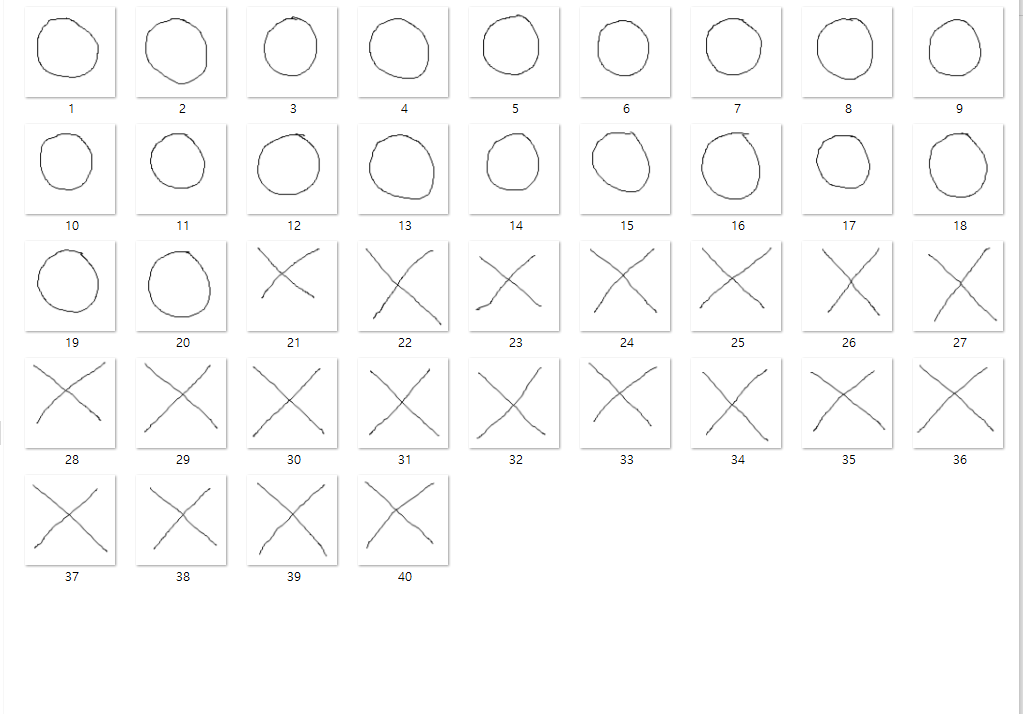

In [1]:
from IPython.display import Image

Image("./1213.PNG")

- 그림판으로 작성.
- O: 20개, X: 20개
- 픽셀: 100 X 100

---

##### 문제2) 이제 여러분들은 opencv를 이용해서 문제1에서 확보한 O와 X 데이터를 읽으면 됩니다. 이때 주의해야할 것은 우리는 mnist 데이터를 cnn으로 학습할 때 사용했던 LeNET을 사용할 예정이라 O와 X 데이터 각각을 28x28 grey 데이터로 변환하도록 합니다. 이 과정을 통해 원본데이터를 읽고 28x28 grey로 변환된 데이터는 별도의 폴더에 저장해둡니다. 이때 폴더 이름을 O, X와 같이 잡아 주면 문제3을 풀 때 유리합니다

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

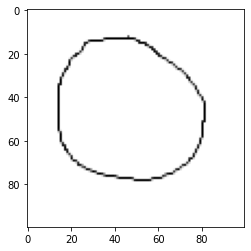

In [3]:
path = f'C:/Users/sanghui/Desktop/toyproject/zerobase/zerobase_machine_learning/test\OX_data/1.png'
src = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(src, cmap='gray')

In [4]:
src.shape

(100, 100)

dst shape: (28, 28)


(-0.5, 27.5, 27.5, -0.5)

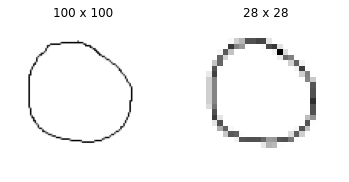

In [5]:
# 이미지 픽셀을 축소하는 것이므로 영역 보간법 사용.

dst = cv2.resize(src, dsize=(28, 28), interpolation=cv2.INTER_AREA)
print(f'dst shape: {dst.shape}')
plt.subplot(1, 2, 1)
plt.imshow(src, cmap='gray')
plt.title('100 x 100')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(dst, cmap='gray')
plt.title('28 x 28')
plt.axis('off')

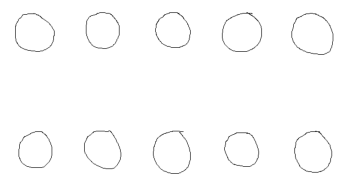

In [6]:
# 원본 데이터 확인 100 x 100
for i, value in enumerate(os.listdir('./OX_data/')[:10]):
    path = f'C:/Users/sanghui/Desktop/toyproject/zerobase/zerobase_machine_learning/test\OX_data/{value}'
    src = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # 500 x 500 to 28 x 28
    plt.subplot(2, 5, i + 1)
    plt.imshow(src, cmap='gray')
    plt.axis('off')

    


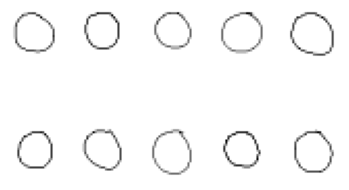

In [7]:
# 28 x 28 변환
for i, value in enumerate(os.listdir('./OX_data/')[:10]):
    path = f'C:/Users/sanghui/Desktop/toyproject/zerobase/zerobase_machine_learning/test\OX_data/{value}'
    src = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    dst = cv2.resize(src, dsize=(28, 28),interpolation=cv2.INTER_AREA)
    # 500 x 500 to 28 x 28
    plt.subplot(2, 5, i + 1)
    plt.imshow(dst, cmap='gray')
    plt.axis('off')

In [8]:
# 전체 데이터 변환
datas = []

for i in os.listdir('./OX_data/'):
    path = f'C:/Users/sanghui/Desktop/toyproject/zerobase/zerobase_machine_learning/test\OX_data/{i}'
    src = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    dst = cv2.resize(src, dsize=(28, 28),interpolation=cv2.INTER_AREA)
    datas.append(dst)

    # 변환 이미지 데이터 별도 폴더에 저장
    cv2.imwrite(f'C:/Users/sanghui/Desktop/toyproject/zerobase/zerobase_machine_learning/test/OX_28_28/{i}', dst)

datas = np.array(datas)
datas.shape
    

(40, 28, 28)

---

##### 문제3) 이제 여러분들은 문제2에서 저당된 데이터를 LeNET을 통해 학습을 시켜보세요. 학습을 할때는 train 데이터와 test 데이터를 8:2로 분리해서 학습을 시키기 바라며, test accuracy가 99%가 넘지 않으면 문제1로 돌아가서 상황을 점검하기 바랍니다. 여러분이 주의할 것은 label을 어떻게 입력해 줄 것 인지를 고민해야 합니다.

- 'O'의 경우 1, 'X'의 경우 0의 label 값을 주고 one hot encoding 대신 loss 함수로 sparse_categorical_crossentrophy 적용. 

In [9]:
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split

In [10]:
# label 값 생성
target = np.concatenate((np.ones(20), np.zeros(20)))
target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [11]:
# 트레인셋, 테스트셋 분리
X_train, X_test, y_train, y_test = train_test_split(datas, target, test_size=0.2, stratify=target,random_state=42, shuffle=True)

In [12]:
X_train.shape, X_test.shape

((32, 28, 28), (8, 28, 28))

In [13]:
y_train.shape, y_test.shape

((32,), (8,))

In [14]:
X_train, X_test = X_train.astype('float32')/255, X_test.astype('float32')/255

In [15]:
y_train, y_test = y_train.astype('uint8'), y_test.astype('uint8')

In [16]:
X_train = X_train.reshape((32,28,28,1))
X_test = X_test.reshape((8, 28, 28, 1))

In [17]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
%%time

hist = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=128, verbose=1)

Epoch 1/100
1/1 [==============================] - 1s 504ms/step - loss: 0.6997 - accuracy: 0.4688 - val_loss: 0.8989 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 38ms/step - loss: 0.9092 - accuracy: 0.5000 - val_loss: 1.0737 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 53ms/step - loss: 1.0264 - accuracy: 0.5000 - val_loss: 0.8292 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 37ms/step - loss: 0.8309 - accuracy: 0.5000 - val_loss: 0.6905 - val_accuracy: 0.8750
Epoch 5/100
1/1 [==============================] - 0s 37ms/step - loss: 0.6877 - accuracy: 0.5625 - val_loss: 0.7368 - val_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 26ms/step - loss: 0.7441 - accuracy: 0.5000 - val_loss: 0.7583 - val_accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 48ms/step - loss: 0.7514 - accuracy: 0.5000 - val_loss: 0.7379 - val_accuracy: 0.5000
Epoch 8/100
1/1 [==

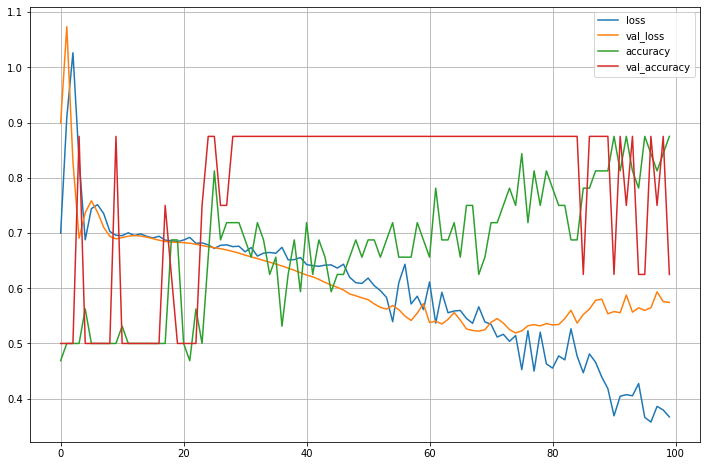

In [21]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [22]:
score = model.evaluate(X_test, y_test)
print(f'Test loss : {score[0]}')
print(f'Test accuracy: {score[1]}')

1/1 [==============================] - 0s 16ms/step - loss: 0.5742 - accuracy: 0.6250
Test loss : 0.5742489099502563
Test accuracy: 0.625


- 훈련세트수의 부족이 원인으로 보임. accuracy와 val_accuracy는 1근처로 가고 있지만 loss와 val_loss가 0.5 부근에서 떨어지지 않고 있다.

- O와 X의 이진분류 문제 이므로 다시 시도 + 데이터 개수 늘려서

In [23]:
# 전체 데이터 변환
datas_2 = []

for i in os.listdir('./OX_data - 2/'):
    path = f'C:/Users/sanghui/Desktop/toyproject/zerobase/zerobase_machine_learning/test/OX_data - 2/{i}'
    src = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    dst = cv2.resize(src, dsize=(28, 28),interpolation=cv2.INTER_AREA)
    datas_2.append(dst)

    # 변환 이미지 데이터 별도 폴더에 저장
    cv2.imwrite(f'C:/Users/sanghui/Desktop/toyproject/zerobase/zerobase_machine_learning/test/OX_28_28_2/{i}', dst)

datas_2 = np.array(datas_2)
datas_2.shape

(100, 28, 28)

In [24]:
# label 값 생성
target_2 = np.concatenate((np.ones(50), np.zeros(50)))
target_2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
# 트레인셋, 테스트셋 분리
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(datas_2, target_2, test_size=0.2, stratify=target_2,random_state=42, shuffle=True)

In [26]:
X_train_re.shape, X_test_re.shape

((80, 28, 28), (20, 28, 28))

In [27]:
X_train_re, X_test_re = X_train_re.astype('float32')/255, X_test_re.astype('float32')/255
y_train_re, y_test_re = y_train_re.astype('uint8'), y_test_re.astype('uint8')

X_train_re = X_train_re.reshape((80, 28, 28, 1))
X_test_re = X_test_re.reshape((20, 28, 28, 1))

In [28]:
y_train_re

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], dtype=uint8)

In [29]:
model2 = models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [30]:
import tensorflow as tf

In [31]:
model2.compile(loss="binary_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

In [32]:
hist2 = model2.fit(X_train_re, y_train_re, batch_size=128, epochs=50, validation_data=(X_test_re, y_test_re))

Epoch 1/50
1/1 [==============================] - 1s 610ms/step - loss: 0.6889 - accuracy: 0.5125 - val_loss: 4.0485 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 58ms/step - loss: 4.0594 - accuracy: 0.5000 - val_loss: 1.4421 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 56ms/step - loss: 1.4008 - accuracy: 0.5000 - val_loss: 0.6878 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 54ms/step - loss: 0.6897 - accuracy: 0.5625 - val_loss: 0.6857 - val_accuracy: 0.9500
Epoch 5/50
1/1 [==============================] - 0s 51ms/step - loss: 0.6889 - accuracy: 0.5625 - val_loss: 0.6832 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 62ms/step - loss: 0.6816 - accuracy: 0.6250 - val_loss: 0.6774 - val_accuracy: 0.9500
Epoch 7/50
1/1 [==============================] - 0s 57ms/step - loss: 0.6786 - accuracy: 0.6750 - val_loss: 0.6717 - val_accuracy: 0.5000
Epoch 8/50
1/1 [==========

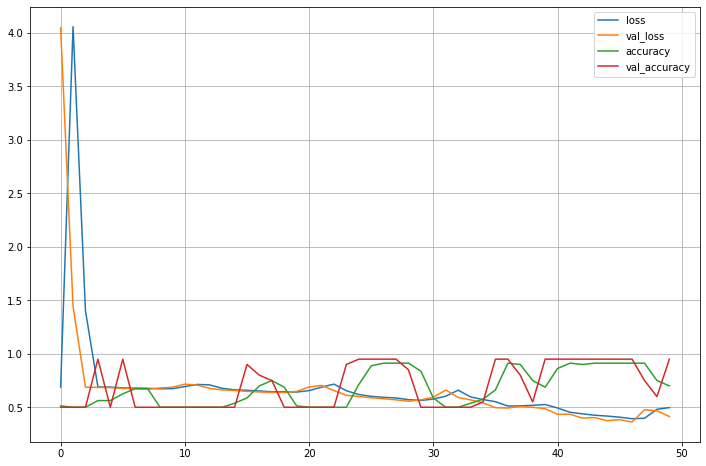

In [33]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist2.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [34]:
score = model2.evaluate(X_test_re, y_test_re)
print(f'Test loss : {score[0]}')
print(f'Test accuracy: {score[1]}')

1/1 [==============================] - 0s 19ms/step - loss: 0.4135 - accuracy: 0.9500
Test loss : 0.41346627473831177
Test accuracy: 0.949999988079071


- 이진분류 방식으로 바꾸고 데이터 세트의 수를 2배로 늘렸더니 10%정도의 성능향상이 있었다. 아무래도 테스트셋의 데이터 수가 미치는 영향이 절대적으로 큰것 같다.

- 이미지 인식 레이어 수정
- 케라스에 있는 ImageDataGenerator를 통해서 더 많은 샘플수 확보

In [35]:
# 이미지 인식 레이어 수정
model3 = models.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 3, 64)        

In [36]:
model3.compile(loss="binary_crossentropy", optimizer='rmsprop', metrics=['accuracy'])
hist3 = model3.fit(X_train_re, y_train_re, batch_size=128, epochs=50, validation_data=(X_test_re, y_test_re))

Epoch 1/50
1/1 [==============================] - 1s 774ms/step - loss: 0.6922 - accuracy: 0.5250 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 46ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 0.6954 - accuracy: 0.4875 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 49ms/step - loss: 0.6936 - accuracy: 0.4500 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 44ms/step - loss: 0.6946 - accuracy: 0.5375 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 41ms/step - loss: 0.6946 - accuracy: 0.4875 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 43ms/step - loss: 0.6901 - accuracy: 0.5750 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 8/50
1/1 [==========

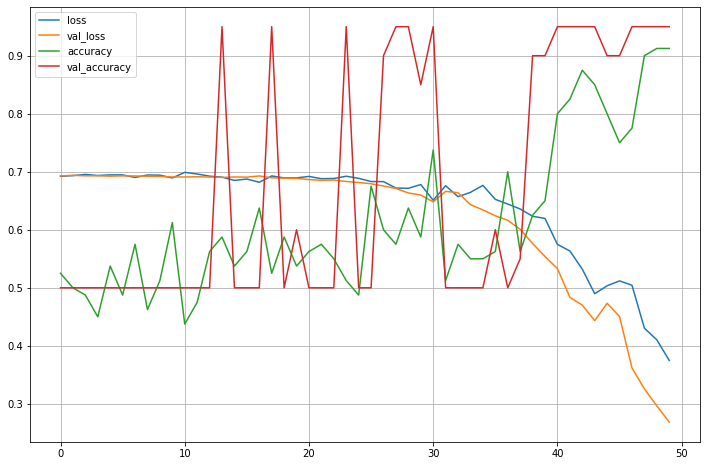

In [37]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist3.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [38]:
score = model3.evaluate(X_test_re, y_test_re)
print(f'Test loss : {score[0]}')
print(f'Test accuracy: {score[1]}')

1/1 [==============================] - 0s 14ms/step - loss: 0.2687 - accuracy: 0.9500
Test loss : 0.26869165897369385
Test accuracy: 0.949999988079071


- 이미지 인식층을 더 생성하고 dropout을 줫지만 별다른 차이가 없다.
- 그렇다면 데이터 샘플수를 더 늘려 학습데이터셋을 더 확보시켜보자. 데이터 수가 적을수록 overfitting 문제가 심해지므로 다시 한번 확인해보도록 한다.

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [40]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale= 1. /255)

In [41]:
train_generator = train_datagen.flow_from_directory('./train_set', target_size=(28, 28), batch_size=5, class_mode='categorical', color_mode="grayscale")

Found 100 images belonging to 2 classes.


In [42]:
test_generator = test_datagen.flow_from_directory('./test_set', target_size=(28, 28), batch_size=5, class_mode='categorical', color_mode="grayscale")

Found 10 images belonging to 2 classes.


In [43]:
model4 = models.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_3 (Flatten)         (None, 3136)             

In [44]:
model4.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [45]:
hist4 = model4.fit_generator(train_generator,
        steps_per_epoch=10,
        epochs=50,
        validation_data=test_generator,
        validation_steps=2)

Epoch 1/50


C:\Users\sanghui\AppData\Local\Temp/ipykernel_11688/3311797694.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist4 = model4.fit_generator(train_generator,


10/10 [==============================] - 1s 31ms/step - loss: 0.8272 - accuracy: 0.4800 - val_loss: 0.6984 - val_accuracy: 0.5000
Epoch 2/50
10/10 [==============================] - 0s 19ms/step - loss: 0.6976 - accuracy: 0.4800 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 3/50
10/10 [==============================] - 0s 19ms/step - loss: 0.6854 - accuracy: 0.5800 - val_loss: 0.6798 - val_accuracy: 0.5000
Epoch 4/50
10/10 [==============================] - 0s 21ms/step - loss: 0.7035 - accuracy: 0.4400 - val_loss: 0.6592 - val_accuracy: 0.5000
Epoch 5/50
10/10 [==============================] - 0s 20ms/step - loss: 0.6647 - accuracy: 0.7000 - val_loss: 0.6240 - val_accuracy: 0.5000
Epoch 6/50
10/10 [==============================] - 0s 18ms/step - loss: 0.6757 - accuracy: 0.6400 - val_loss: 0.5760 - val_accuracy: 1.0000
Epoch 7/50
10/10 [==============================] - 0s 21ms/step - loss: 0.6241 - accuracy: 0.7400 - val_loss: 0.4853 - val_accuracy: 1.0000
Epoch 8/50
10/10 [======

In [46]:
scores = model4.evaluate_generator(test_generator, steps=10)
print("%s: %.2f%%" %(model4.metrics_names[1], scores[1]*100))

C:\Users\sanghui\AppData\Local\Temp/ipykernel_11688/2923208219.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model4.evaluate_generator(test_generator, steps=10)


accuracy: 100.00%


In [49]:
print(f'final accuracy : {scores[1] * 100} %')

final accuracy : 100.0 %


- image_data_generator를 이용해 더 많은 테스트케이스를 추가로 적용한 결과 accuracy가 100%로 나왔다.

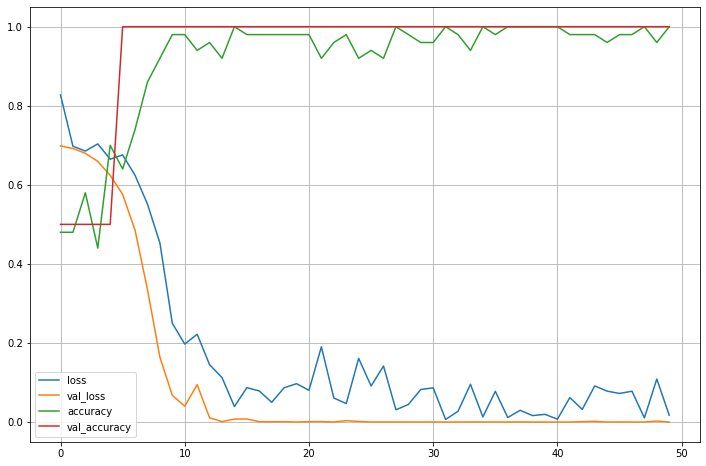

In [47]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist4.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

- 이전 학습에 비해 더 좋은성과가 나타난것으로 보인다. 

- 외부에서 열시 그래프 랜더 오류로 그래프만 별도 첨부

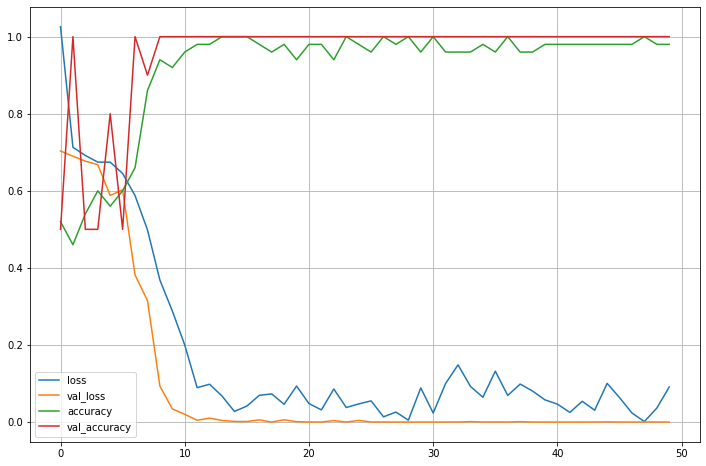

In [48]:
Image("./output.png")